In [15]:
import random
import string

names = []

for i in range(20):
    if i % random.randint(1,3):
        letters = string.ascii_lowercase
        name = ''.join(random.choice(letters) for i in range(5))
        name = name + str(i)
    else: 
        name = 'Cycle' + str(i)
    names.append(name)

print(names)

['Cycle0', 'Cycle1', 'dmoxp2', 'govoz3', 'Cycle4', 'wpcye5', 'Cycle6', 'ivszc7', 'Cycle8', 'gecjh9', 'dzapx10', 'njhnn11', 'Cycle12', 'Cycle13', 'ximjw14', 'Cycle15', 'Cycle16', 'wqsrx17', 'Cycle18', 'Cycle19']


In [16]:
cycle = []
others = []
for name in names:
    if name.find('Cycle') != -1 :
        cycle.append(name)
    else:
        others.append(name)
        
print(cycle)
print(others)

['Cycle0', 'Cycle1', 'Cycle4', 'Cycle6', 'Cycle8', 'Cycle12', 'Cycle13', 'Cycle15', 'Cycle16', 'Cycle18', 'Cycle19']
['dmoxp2', 'govoz3', 'wpcye5', 'ivszc7', 'gecjh9', 'dzapx10', 'njhnn11', 'ximjw14', 'wqsrx17']


In [9]:
txt = "Hello, welcome to my world."

x = txt.find("welcome")

print(x)

7


In [31]:
# class testing
import networkx as nx
import matplotlib.pyplot as plt

class simScheduling:
    
    def __init__(self, relationship_dict = {}, assumtion = [], printFlag = True):
        
        self.relationships = relationship_dict
        if type(assumtion) == str:
            self.assumtion = [assumtion]
        elif type(assumtion) == list:
            self.assumtion = assumtion
        else:
            print('Please intrudce the assumption as a list, even if it has only one element or as an empty list')
        self.printFlag = printFlag
        
        #methods created for usage
        self.graph = self.create_directional_graph_wIndNodes(self.relationships)
        
        self.sccs = self.tarjans_algorithm(self.graph)
        self.cycleDetected = False
        
        
        for group in self.sccs:
            if len(group) > 1:
                self.cycleDetected = True
        
        if self.cycleDetected == False:
            self.topological_order = self.topological_sort(self.graph)
            self.new_graph = None
            self.cycle_topological_order = None
            self.cycleName= None
        else:
            self.new_graph = self.create_scc_encapsulated_graph(self.graph,self.sccs)
            self.topological_order = self.topological_sort(self.new_graph)
            self.cycle_topological_order = self.sort_cycle(self.graph,self.sccs,self.assumtion)
            self.cycleName= self.findCycleName(self.topological_order)
                
        if printFlag == True:
            self.plot_directed_graph_wIndNodes(self.graph)

        
    def __str__(self):
        pass

    def findCycleName(self, names)->list:
        cycleNames = []
        for name in names:
            if name.find('Cycle') != -1 :
                cycleNames.append(name)
        return cycleNames
    
    def create_directional_graph(self, relationship_dict) ->dict:
        directional_graph = {}

        for node, connections in relationship_dict.items():
            for target_node in connections:
                if target_node:
                    if target_node not in directional_graph:
                        directional_graph[target_node] = set()
                    directional_graph[target_node].add(node)
                if node not in directional_graph:
                    directional_graph[node] = set()

        return {node: list(edges) for node, edges in directional_graph.items()}
    
    def create_directional_graph_wIndNodes(self, relationship_dict):
        directional_graph = {}

        # Iterate through each node and its connections in the input dictionary
        for node, connections in relationship_dict.items():
            # Ensure the node itself is included in the directional graph
            if node not in directional_graph:
                directional_graph[node] = set()
            
            for target_node in connections:
                # Add the node to the adjacency list of the target node
                if target_node:
                    if target_node not in directional_graph:
                        directional_graph[target_node] = set()
                    directional_graph[target_node].add(node)

        # Add any nodes that are in the relationships as independent nodes if they are not present
        for node in relationship_dict:
            if node not in directional_graph:
                directional_graph[node] = set()

        # Convert sets to lists for consistency
        return {node: list(edges) for node, edges in directional_graph.items()} 
    
    def plot_directed_graph_wIndNodes(self,directional_graph):
        # Create a directed graph object
        G = nx.DiGraph()

        # Add nodes and edges from the directional graph dictionary
        for node, edges in directional_graph.items():
            for edge in edges:
                G.add_edge(node, edge)
            # Ensure the node itself is included in the graph
            if node not in G:
                G.add_node(node)

        # Ensure all nodes from the original graph are included, even if they have no edges
        all_nodes = set(directional_graph.keys())
        for node in all_nodes:
            if node not in G:
                G.add_node(node)

        # Draw the graph
        pos = nx.spring_layout(G)  # Position nodes using the spring layout
        plt.figure(figsize=(14, 7))
        nx.draw_networkx_nodes(G, pos, node_size=2000, node_color="lightblue", alpha=0.5, linewidths=5)
        nx.draw_networkx_labels(G, pos, font_size=8, font_weight="bold")

        # Draw edges with arrows separately to ensure each direction is represented
        nx.draw_networkx_edges(G, pos, edgelist=G.edges(), arrows=True, arrowstyle='-|>', 
                            arrowsize=20, edge_color="red", connectionstyle='arc3,rad=0.2')

        plt.title("Directed Graph")
        plt.show()
    
    def plot_bidirected_graph(self, directional_graph):
        # Create a directed graph object
        G = nx.DiGraph()

        # Add nodes and edges from the directional graph dictionary
        for node, edges in directional_graph.items():
            for edge in edges:
                G.add_edge(node, edge)

        # Draw the graph
        pos = nx.spring_layout(G)  # Position nodes using the spring layout
        plt.figure(figsize=(10, 6))
        nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", 
                font_size=10, font_weight="bold", edge_color="gray", arrows=True, 
                arrowstyle='-|>', arrowsize=20)

        plt.title("Directed Graph")
        plt.show()

    def plot_directed_graph(self, directional_graph):
        # Create a directed graph object
        G = nx.DiGraph()

        # Add nodes and edges from the directional graph dictionary
        for node, edges in directional_graph.items():
            for edge in edges:
                G.add_edge(node, edge)

        # Draw the graph
        pos = nx.spring_layout(G)  # Position nodes using the spring layout
        plt.figure(figsize=(15, 9))
        nx.draw_networkx_nodes(G, pos, node_size=2000, node_color="lightblue", alpha= 0.5, linewidths=5)
        nx.draw_networkx_labels(G, pos, font_size=8, font_weight="bold")

        # Draw edges with arrows separately to ensure each direction is represented
        nx.draw_networkx_edges(G, pos, edgelist=G.edges(), arrows=True,arrowstyle='-|>', 
                            arrowsize=20, edge_color="red", connectionstyle='arc3,rad=0.2')

        plt.title("Directed Graph")
        plt.show()
   
    def tarjans_algorithm(self, directional_graph)->list:
        index = 0
        stack = []
        indices = {}
        lowlink = {}
        on_stack = {}
        sccs = []

        def strongconnect(node):
            nonlocal index
            indices[node] = index
            lowlink[node] = index
            index += 1
            stack.append(node)
            on_stack[node] = True

            for neighbor in directional_graph.get(node, []):
                if neighbor not in indices:
                    strongconnect(neighbor)
                    lowlink[node] = min(lowlink[node], lowlink[neighbor])
                elif on_stack[neighbor]:
                    lowlink[node] = min(lowlink[node], indices[neighbor])

            if lowlink[node] == indices[node]:
                scc = []
                while True:
                    w = stack.pop()
                    on_stack[w] = False
                    scc.append(w)
                    if w == node:
                        break
                sccs.append(scc)

        for node in directional_graph:
            if node not in indices:
                strongconnect(node)
        return sccs
    
    def topological_sort(self, directional_graph)->list:
        visited = set()
        stack = []

        def dfs(node):
            if node in visited:
                return
            visited.add(node)
            for neighbor in directional_graph.get(node, []):
                if neighbor not in visited:
                    dfs(neighbor)
            stack.append(node)

        for node in directional_graph:
            if node not in visited:
                dfs(node)

        return stack[::-1]
    
    def create_scc_encapsulated_graph(self,directional_graph, sccs)->dict:
        # Create a mapping from nodes to their SCC index
        node_to_scc = {}
        for idx, scc in enumerate(sccs):
            for node in scc:
                node_to_scc[node] = f"Cycle{idx}" if len(scc) > 1 else node
        
        # Initialize the new graph
        new_graph = {scc_id: set() for scc_id in node_to_scc.values()}

        # Populate the new graph
        for node, neighbors in directional_graph.items():
            node_scc = node_to_scc[node]
            for neighbor in neighbors:
                neighbor_scc = node_to_scc[neighbor]
                if node_scc != neighbor_scc:
                    new_graph[node_scc].add(neighbor_scc)

        # Convert sets to lists for consistency
        new_graph = {k: list(v) for k, v in new_graph.items()}

        return new_graph
    
    def sort_cycle(self, directional_graph,sccs,assumption)->list:
        if assumption == []:
            assumption = list(self.relationships.keys())[0]
            # assumption = list(directional_graph.keys())[0]
        else:
            assumption = assumption[0]
            
        for group in sccs:
            if len(group) != 1:
                cycle_comp = group
        cycle_directional_graph = {}
        for name, dependencies in directional_graph.items():
            new_dependency = []
            for comp in dependencies:
                if comp != assumption and comp in cycle_comp:
                    new_dependency.append(comp)
            if name in cycle_comp:
                cycle_directional_graph[name] = new_dependency
        
                
        cycle_order = self.topological_sort(cycle_directional_graph)
        # print(cycle_directional_graph)
        return(cycle_order)

    

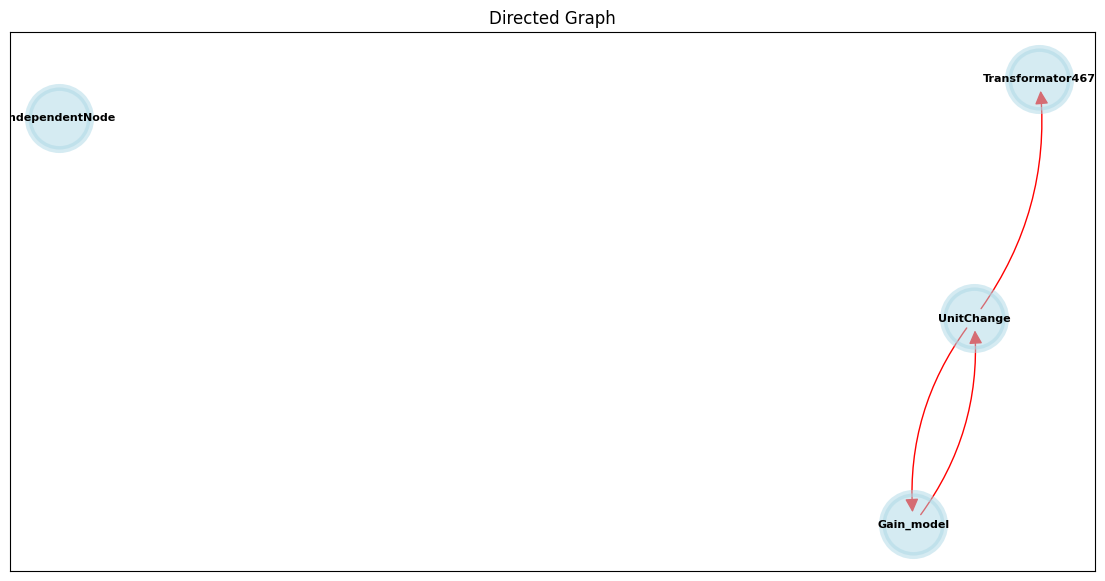

{'Gain_model': ['UnitChange'], 'UnitChange': ['Gain_model'], 'Transformator467': ['UnitChange'], 'IndependentNode': []}


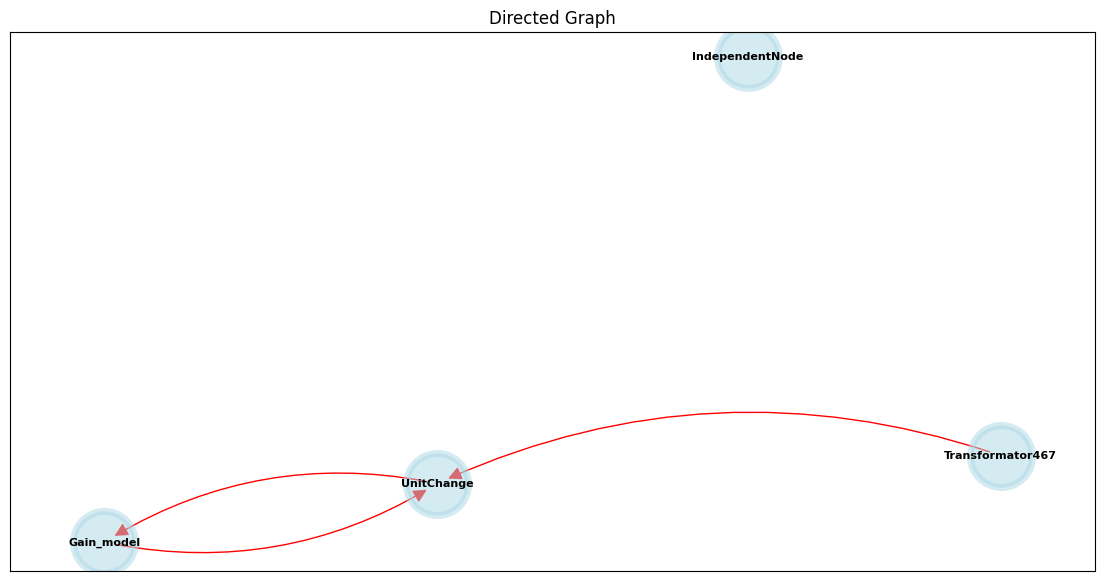

In [123]:
import networkx as nx
import matplotlib.pyplot as plt

def create_directional_graph(relationship_dict):
    directional_graph = {}

    # Iterate through each node and its connections in the input dictionary
    for node, connections in relationship_dict.items():
        # Ensure the node itself is included in the directional graph
        if node not in directional_graph:
            directional_graph[node] = set()
        
        for target_node in connections:
            # Add the node to the adjacency list of the target node
            if target_node:
                if target_node not in directional_graph:
                    directional_graph[target_node] = set()
                directional_graph[target_node].add(node)

    # Add any nodes that are in the relationships as independent nodes if they are not present
    for node in relationship_dict:
        if node not in directional_graph:
            directional_graph[node] = set()

    # Convert sets to lists for consistency
    return {node: list(edges) for node, edges in directional_graph.items()}



def plot_directed_graph(directional_graph):
    # Create a directed graph object
    G = nx.DiGraph()

    # Add nodes and edges from the directional graph dictionary
    for node, edges in directional_graph.items():
        for edge in edges:
            G.add_edge(node, edge)
        # Ensure the node itself is included in the graph
        if node not in G:
            G.add_node(node)

    # Ensure all nodes from the original graph are included, even if they have no edges
    all_nodes = set(directional_graph.keys())
    for node in all_nodes:
        if node not in G:
            G.add_node(node)

    # Draw the graph
    pos = nx.spring_layout(G)  # Position nodes using the spring layout
    plt.figure(figsize=(14, 7))
    nx.draw_networkx_nodes(G, pos, node_size=2000, node_color="lightblue", alpha=0.5, linewidths=5)
    nx.draw_networkx_labels(G, pos, font_size=8, font_weight="bold")

    # Draw edges with arrows separately to ensure each direction is represented
    nx.draw_networkx_edges(G, pos, edgelist=G.edges(), arrows=True, arrowstyle='-|>', 
                           arrowsize=20, edge_color="red", connectionstyle='arc3,rad=0.2')

    plt.title("Directed Graph")
    plt.show()

# Example usage
directional_graph = {
    'Gain_model': ['UnitChange'],
    'UnitChange': ['Transformator467', 'Gain_model'],
    'IndependentNode': []
}

plot_directed_graph(directional_graph)

# Example usage
relationship_dict = {
    'Gain_model': {'UnitChange': None},
    'UnitChange': {'Transformator467': None, 'Gain_model': None},
    'IndependentNode': {}
}

directional_graph = create_directional_graph(relationship_dict)
print(directional_graph)
plot_directed_graph(directional_graph)


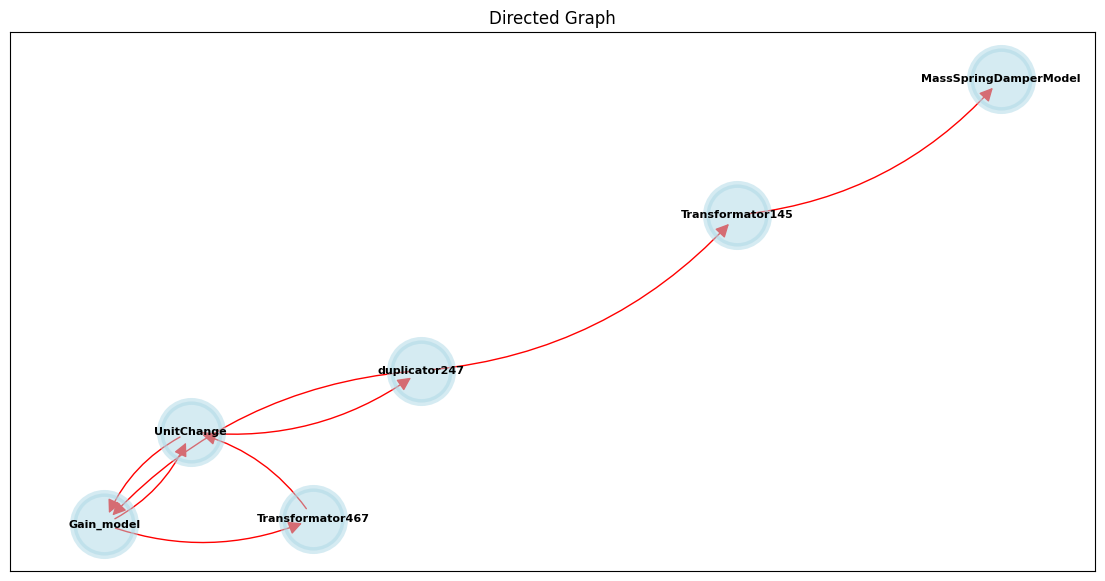

In [37]:
#example:

relationship_dict = {'Gain_model':{'UnitChange': ['temp_in', 'vol_in'], 'duplicator247': ['mass_in']},
'UnitChange': {'Transformator467': ['temp_in'], 'Gain_model': ['mass_in', 'vol_in', 'time']},
'MassSpringDamperModel':{'Transformator145': ['Force']},
'duplicator247': {'UnitChange': ['mass']},
'Transformator467':{'Gain_model': ['Tf']},
'Transformator145':{'duplicator247': ['mass']}    
}

# relationship_dict = {'Gain_model':{},
# 'UnitChange': {},
# 'MassSpringDamperModel':{},
# 'duplicator247': {},
# 'Transformator467':{},
# 'Transformator145':{}     
# }

assumption = ['Gain_model']

    
    

# schedule = simScheduling(relationship_dict=relationship_dict,assumtion=assumption,printFlag=True)
schedule = simScheduling(relationship_dict=relationship_dict)

In [38]:
print(schedule.cycle_topological_order)
print(schedule.topological_order)
# for node,edges in schedule.new_graph.items():
#     print(node + ":" + str(edges))    

print(schedule.graph)
print(schedule.cycleName)

['Gain_model', 'Transformator467', 'UnitChange', 'duplicator247']
['Cycle2', 'Transformator145', 'MassSpringDamperModel']
{'Gain_model': ['UnitChange', 'Transformator467'], 'UnitChange': ['duplicator247', 'Gain_model'], 'duplicator247': ['Gain_model', 'Transformator145'], 'Transformator467': ['UnitChange'], 'MassSpringDamperModel': [], 'Transformator145': ['MassSpringDamperModel']}
['Cycle2']


In [10]:
#creation of directed graph 

def create_directional_graph(relationship_dict):
    directional_graph = {}

    for node, connections in relationship_dict.items():
        for target_node in connections:
            if target_node:
                if target_node not in directional_graph:
                    directional_graph[target_node] = set()
                directional_graph[target_node].add(node)
            if node not in directional_graph:
                directional_graph[node] = set()

    return {node: list(edges) for node, edges in directional_graph.items()}

# Example usage
# relationship_dict = {
#     'Gain_model': {'UnitChange': None},
#     'UnitChange': {'Transformator467': None, 'Gain_model': None}
# }

relationship_dict = {'Gain_model':{'UnitChange': ['temp_in', 'vol_in'], 'duplicator247': ['mass_in']},
'UnitChange': {'Transformator467': ['temp_in'], 'Gain_model': ['mass_in', 'vol_in', 'time']},
'MassSpringDamperModel':{'Transformator145': ['Force']},
'duplicator247': {'UnitChange': ['mass']},
'Transformator467':{'Gain_model': ['Tf']},
'Transformator145':{'duplicator247': ['mass']}    
}

directional_graph = create_directional_graph(relationship_dict)
print(directional_graph)


{'UnitChange': ['Gain_model', 'duplicator247'], 'Gain_model': ['Transformator467', 'UnitChange'], 'duplicator247': ['Gain_model', 'Transformator145'], 'Transformator467': ['UnitChange'], 'Transformator145': ['MassSpringDamperModel'], 'MassSpringDamperModel': []}


In [2]:
# 3bigger example for directed graph
relationships = {
    'Gain_model': {'UnitChange':None},
    'UnitChange': {'Transformator467': None, 'Gain_model': None},
    'Transformator467': {'Gain_model':None},
    'MassSpringDamperModel': {'Transformator1': None,'Transformator2': None,'Transformator3': None},
    'Transformator1': {'Gain_model': None},
    'Transformator2': {'Gain_model': None},
    'Transformator3': {'Gain_model': None}
}
directional_graph = create_directional_graph(relationships)
print(directional_graph)

{'UnitChange': ['Gain_model'], 'Gain_model': ['Transformator467', 'UnitChange', 'Transformator1', 'Transformator2', 'Transformator3'], 'Transformator467': ['UnitChange'], 'Transformator1': ['MassSpringDamperModel'], 'MassSpringDamperModel': [], 'Transformator2': ['MassSpringDamperModel'], 'Transformator3': ['MassSpringDamperModel']}


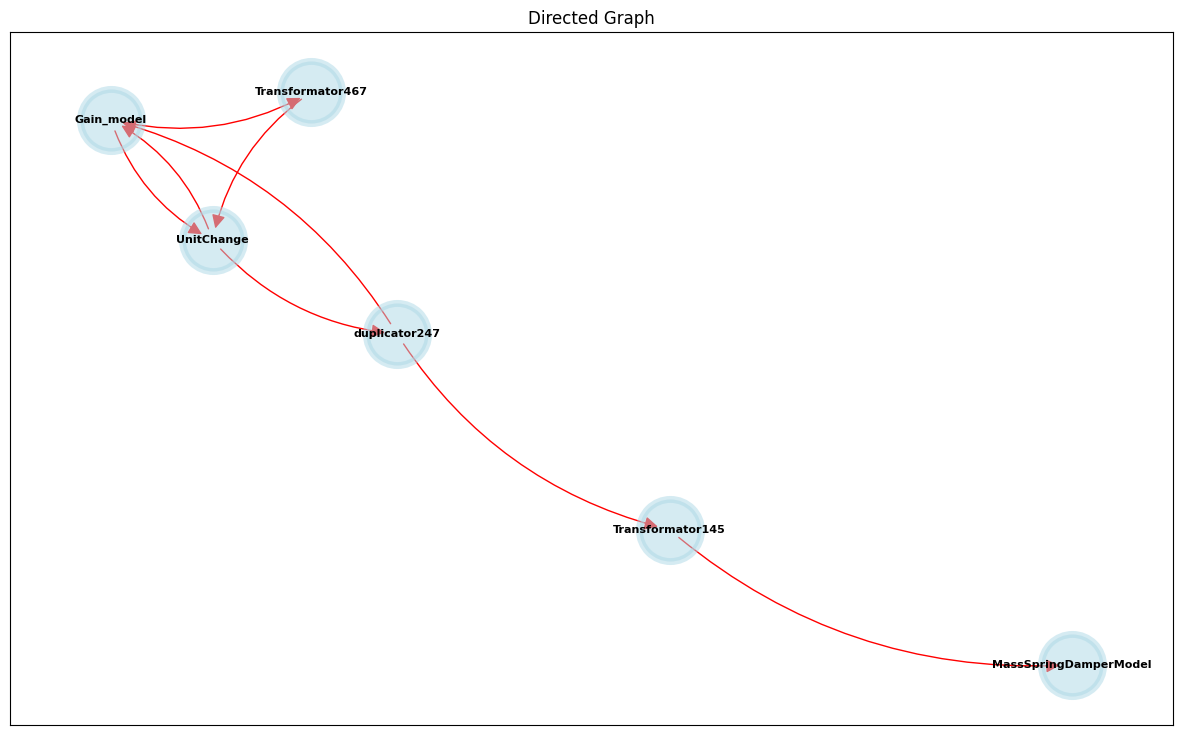

In [ ]:
#dirrected graph ploting
import networkx as nx
import matplotlib.pyplot as plt

def plot_bidirected_graph(directional_graph):
    # Create a directed graph object
    G = nx.DiGraph()

    # Add nodes and edges from the directional graph dictionary
    for node, edges in directional_graph.items():
        for edge in edges:
            G.add_edge(node, edge)

    # Draw the graph
    pos = nx.spring_layout(G)  # Position nodes using the spring layout
    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", 
            font_size=10, font_weight="bold", edge_color="gray", arrows=True, 
            arrowstyle='-|>', arrowsize=20)

    plt.title("Directed Graph")
    plt.show()

import networkx as nx
import matplotlib.pyplot as plt

def plot_directed_graph(directional_graph):
    # Create a directed graph object
    G = nx.DiGraph()

    # Add nodes and edges from the directional graph dictionary
    for node, edges in directional_graph.items():
        for edge in edges:
            G.add_edge(node, edge)

    # Draw the graph
    pos = nx.spring_layout(G)  # Position nodes using the spring layout
    plt.figure(figsize=(15, 9))
    nx.draw_networkx_nodes(G, pos, node_size=2000, node_color="lightblue", alpha= 0.5, linewidths=5)
    nx.draw_networkx_labels(G, pos, font_size=8, font_weight="bold")

    # Draw edges with arrows separately to ensure each direction is represented
    nx.draw_networkx_edges(G, pos, edgelist=G.edges(), arrows=True,arrowstyle='-|>', 
                           arrowsize=20, edge_color="red", connectionstyle='arc3,rad=0.2')
    
    # nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", 
    #         font_size=10, font_weight="bold", edge_color="gray", arrows=True, 
    #         arrowstyle='-|>', arrowsize=20)

    plt.title("Directed Graph")
    plt.show()

# Example usage
# directional_graph = {
#     'UnitChange': ['Gain_model'],
#     'Transformator467': ['UnitChange'],
#     'Gain_model': ['UnitChange']
# }

directional_graph = {'UnitChange': ['Gain_model', 'duplicator247'], 
                      'Gain_model': ['Transformator467', 'UnitChange'], 
                      'duplicator247': ['Gain_model', 'Transformator145'],
                      'Transformator467': ['UnitChange'], 'Transformator145': ['MassSpringDamperModel'], 
                      'MassSpringDamperModel': []}
# plot_bidirected_graph(directional_graph)
plot_directed_graph(directional_graph)


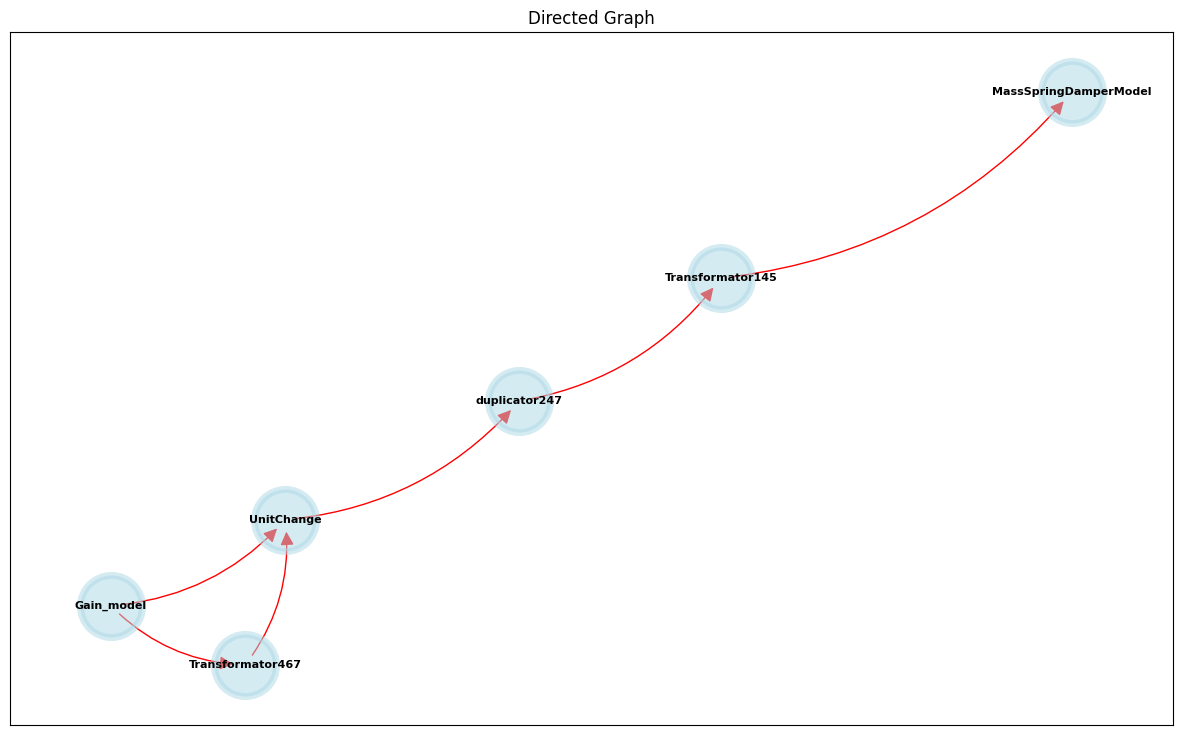

[['MassSpringDamperModel'], ['Transformator145'], ['duplicator247'], ['UnitChange'], ['Transformator467'], ['Gain_model']]


In [52]:
#algorithm to find strongly correlated components -> cycles, if component not in cycle it is created as independent list
def tarjans_algorithm(directional_graph):
    index = 0
    stack = []
    indices = {}
    lowlink = {}
    on_stack = {}
    sccs = []

    def strongconnect(node):
        nonlocal index
        indices[node] = index
        lowlink[node] = index
        index += 1
        stack.append(node)
        on_stack[node] = True

        for neighbor in directional_graph.get(node, []):
            if neighbor not in indices:
                strongconnect(neighbor)
                lowlink[node] = min(lowlink[node], lowlink[neighbor])
            elif on_stack[neighbor]:
                lowlink[node] = min(lowlink[node], indices[neighbor])

        if lowlink[node] == indices[node]:
            scc = []
            while True:
                w = stack.pop()
                on_stack[w] = False
                scc.append(w)
                if w == node:
                    break
            sccs.append(scc)

    for node in directional_graph:
        if node not in indices:
            strongconnect(node)

    return sccs

# Example usage
# directional_graph = {
#     'UnitChange': ['Gain_model'],
#     'Transformator467': ['UnitChange'],
#     'Gain_model': ['UnitChange']
# }

relationship_dict = {'Gain_model':{'UnitChange': ['temp_in', 'vol_in'], 'duplicator247': ['mass_in']},
'UnitChange': {'Transformator467': ['temp_in'], 'Gain_model': ['mass_in', 'vol_in', 'time']},
'MassSpringDamperModel':{'Transformator145': ['Force']},
'duplicator247': {'UnitChange': ['mass']},
'Transformator467':{'Gain_model': ['Tf']},
'Transformator145':{'duplicator247': ['mass']}    
}
# modificatiom
relationship_dict = {'Gain_model':{},
'UnitChange': {'Transformator467': ['temp_in'], 'Gain_model': ['mass_in', 'vol_in', 'time']},
'MassSpringDamperModel':{'Transformator145': ['Force']},
'duplicator247': {'UnitChange': ['mass']},
'Transformator467':{'Gain_model': ['Tf']},
'Transformator145':{'duplicator247': ['mass']}    
}
directional_graph = create_directional_graph(relationship_dict)
sccs = tarjans_algorithm(directional_graph)
plot_directed_graph(directional_graph)
print(sccs)


In [57]:
#creates a scheduling when there is no cycles
def topological_sort(directional_graph):
    visited = set()
    stack = []

    def dfs(node):
        if node in visited:
            return
        visited.add(node)
        for neighbor in directional_graph.get(node, []):
            if neighbor not in visited:
                dfs(neighbor)
        stack.append(node)

    for node in directional_graph:
        if node not in visited:
            dfs(node)

    return stack[::-1]

# Example usage
directional_graph = {
    'UnitChange': ['Gain_model'],
    'Transformator467': ['UnitChange'],
    'Gain_model': ['UnitChange']
}

relationship_dict = {'Gain_model':{},
'UnitChange': {'Transformator467': ['temp_in'], 'Gain_model': ['mass_in', 'vol_in', 'time']},
'MassSpringDamperModel':{'Transformator145': ['Force']},
'duplicator247': {'UnitChange': ['mass']},
'Transformator467':{'Gain_model': ['Tf']},
'Transformator145':{'duplicator247': ['mass']}    
}
relationship_dict = {'Gain_model':{'UnitChange': ['temp_in', 'vol_in'], 'duplicator247': ['mass_in']},
'UnitChange': {'Transformator467': ['temp_in'], 'Gain_model': ['mass_in', 'vol_in', 'time']},
'MassSpringDamperModel':{'Transformator145': ['Force']},
'duplicator247': {'UnitChange': ['mass']},
'Transformator467':{'Gain_model': ['Tf']},
'Transformator145':{'duplicator247': ['mass']}    
}

directional_graph = create_directional_graph(relationship_dict)
sccs = tarjans_algorithm(directional_graph)
sortable = True
cycles =[]
for group in sccs:
    if len(group) != 1:
        sortable = False
        cycles.append(group)
if sortable == True:
    topological_order = topological_sort(directional_graph)
    print(topological_order)
# plot_directed_graph(directional_graph)
print(sccs)
print(cycles)



[['MassSpringDamperModel'], ['Transformator145'], ['duplicator247', 'Transformator467', 'Gain_model', 'UnitChange']]
[['duplicator247', 'Transformator467', 'Gain_model', 'UnitChange']]


In [61]:
def create_scc_graph(directional_graph, sccs):
    # Create a mapping from nodes to their SCC index
    node_to_scc = {}
    for idx, scc in enumerate(sccs):
        for node in scc:
            node_to_scc[node] = idx
    
    # Initialize the new directional graph
    new_graph = {idx: set() for idx, scc in enumerate(sccs)}

    # Populate the new graph
    for node, neighbors in directional_graph.items():
        node_scc = node_to_scc[node]
        for neighbor in neighbors:
            neighbor_scc = node_to_scc[neighbor]
            if node_scc != neighbor_scc:
                new_graph[node_scc].add(neighbor_scc)

    # Convert sets to lists for consistency
    new_graph = {k: list(v) for k, v in new_graph.items()}
    
    return new_graph

# Example usage
directional_graph = {
    'UnitChange': ['Gain_model'],
    'Transformator467': ['UnitChange'],
    'Gain_model': ['UnitChange']
}
# relationship_dict = {'Gain_model':{'UnitChange': ['temp_in', 'vol_in'], 'duplicator247': ['mass_in']},
# 'UnitChange': {'Transformator467': ['temp_in'], 'Gain_model': ['mass_in', 'vol_in', 'time']},
# 'MassSpringDamperModel':{'Transformator145': ['Force']},
# 'duplicator247': {'UnitChange': ['mass']},
# 'Transformator467':{'Gain_model': ['Tf']},
# 'Transformator145':{'duplicator247': ['mass']}    
# }

directional_graph = create_directional_graph(relationship_dict)
print(directional_graph)
sccs = tarjans_algorithm(directional_graph)
# sccs = tarjans_algorithm(directional_graph)
print(sccs)
new_graph = create_scc_graph(directional_graph, sccs)
print(new_graph)
directional_graph = {'UnitChange': ['Gain_model', 'duplicator247'], 'Gain_model': ['Transformator467', 'UnitChange'], 'duplicator247': ['Gain_model', 'Transformator145'], 'Transformator467': ['UnitChange'], 'Transformator145': ['MassSpringDamperModel'], 'MassSpringDamperModel': []}
new_graph ={'Cycle': ['Transformator145'],'Transformator145': ['MassSpringDamperModel'], 'MassSpringDamperModel': []}

{'UnitChange': ['Gain_model', 'duplicator247'], 'Gain_model': ['Transformator467', 'UnitChange'], 'duplicator247': ['Gain_model', 'Transformator145'], 'Transformator467': ['UnitChange'], 'Transformator145': ['MassSpringDamperModel'], 'MassSpringDamperModel': []}
[['MassSpringDamperModel'], ['Transformator145'], ['duplicator247', 'Transformator467', 'Gain_model', 'UnitChange']]
{0: [], 1: [0], 2: [1]}


{'MassSpringDamperModel': [], 'Transformator145': ['MassSpringDamperModel'], 'duplicator247': ['Transformator145'], 'Cycle3': ['duplicator247']}
['Cycle3', 'duplicator247', 'Transformator145', 'MassSpringDamperModel']


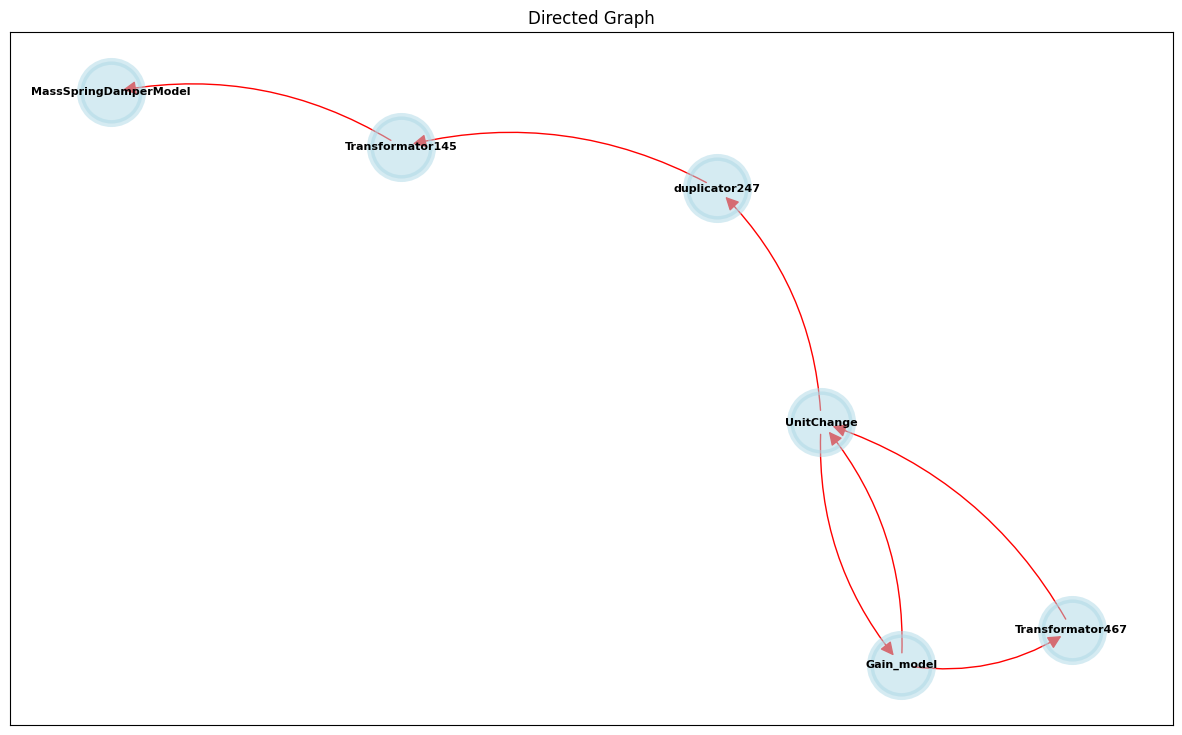

In [68]:
#encampulate scc for a new graph
def create_scc_encapsulated_graph(directional_graph, sccs):
    # Create a mapping from nodes to their SCC index
    node_to_scc = {}
    for idx, scc in enumerate(sccs):
        for node in scc:
            node_to_scc[node] = f"Cycle{idx}" if len(scc) > 1 else node
    
    # Initialize the new graph
    new_graph = {scc_id: set() for scc_id in node_to_scc.values()}

    # Populate the new graph
    for node, neighbors in directional_graph.items():
        node_scc = node_to_scc[node]
        for neighbor in neighbors:
            neighbor_scc = node_to_scc[neighbor]
            if node_scc != neighbor_scc:
                new_graph[node_scc].add(neighbor_scc)

    # Convert sets to lists for consistency
    new_graph = {k: list(v) for k, v in new_graph.items()}

    return new_graph

# Example usage
directional_graph = {
    'UnitChange': ['Gain_model', 'duplicator247'],
    'Gain_model': ['Transformator467', 'UnitChange'],
    'duplicator247': ['Transformator145','Gain_model'],
    'Transformator467': ['UnitChange'],
    'Transformator145': ['MassSpringDamperModel'],
    'MassSpringDamperModel': []
}

# sccs = [
#     ['MassSpringDamperModel'],
#     ['Transformator145'],
    
#     ['duplicator247', 'Transformator467', 'Gain_model', 'UnitChange']
# ]

sccs = tarjans_algorithm(directional_graph)
new_graph = create_scc_encapsulated_graph(directional_graph, sccs)
print(new_graph)
topological_order = topological_sort(new_graph)
print(topological_order)
plot_directed_graph(directional_graph=directional_graph)

In [87]:
print(sccs)
def sort_cycle(directional_graph,sccs,assumption):
    if assumption == []:
        assumption = list(directional_graph.keys())[0]
    else:
        assumption = assumption[0]
        
    for group in sccs:
        if len(group) != 1:
            cycle_comp = group
    cycle_directional_graph = {}
    for name, dependencies in directional_graph.items():
        new_dependency = []
        for comp in dependencies:
            if comp != assumption and comp in cycle_comp:
                new_dependency.append(comp)
        if name in cycle_comp:
            cycle_directional_graph[name] = new_dependency
       
            
    cycle_order = topological_sort(cycle_directional_graph)
    print(cycle_directional_graph)
    return(cycle_order)
directional_graph = {
    'UnitChange': ['Gain_model', 'duplicator247'],
    'Gain_model': ['Transformator467', 'UnitChange'],
    'duplicator247': ['Transformator145','Gain_model'],
    'Transformator467': ['UnitChange'],
    'Transformator145': ['MassSpringDamperModel'],
    'MassSpringDamperModel': []
}
sccs = tarjans_algorithm(directional_graph=directional_graph)
assumption = ['Gain_model']

sorted = sort_cycle(directional_graph,sccs,assumption)
print(sorted)

[['MassSpringDamperModel'], ['Transformator145'], ['duplicator247', 'Transformator467', 'Gain_model', 'UnitChange']]
{'UnitChange': ['duplicator247'], 'Gain_model': ['Transformator467', 'UnitChange'], 'duplicator247': [], 'Transformator467': ['UnitChange']}
['Gain_model', 'Transformator467', 'UnitChange', 'duplicator247']
